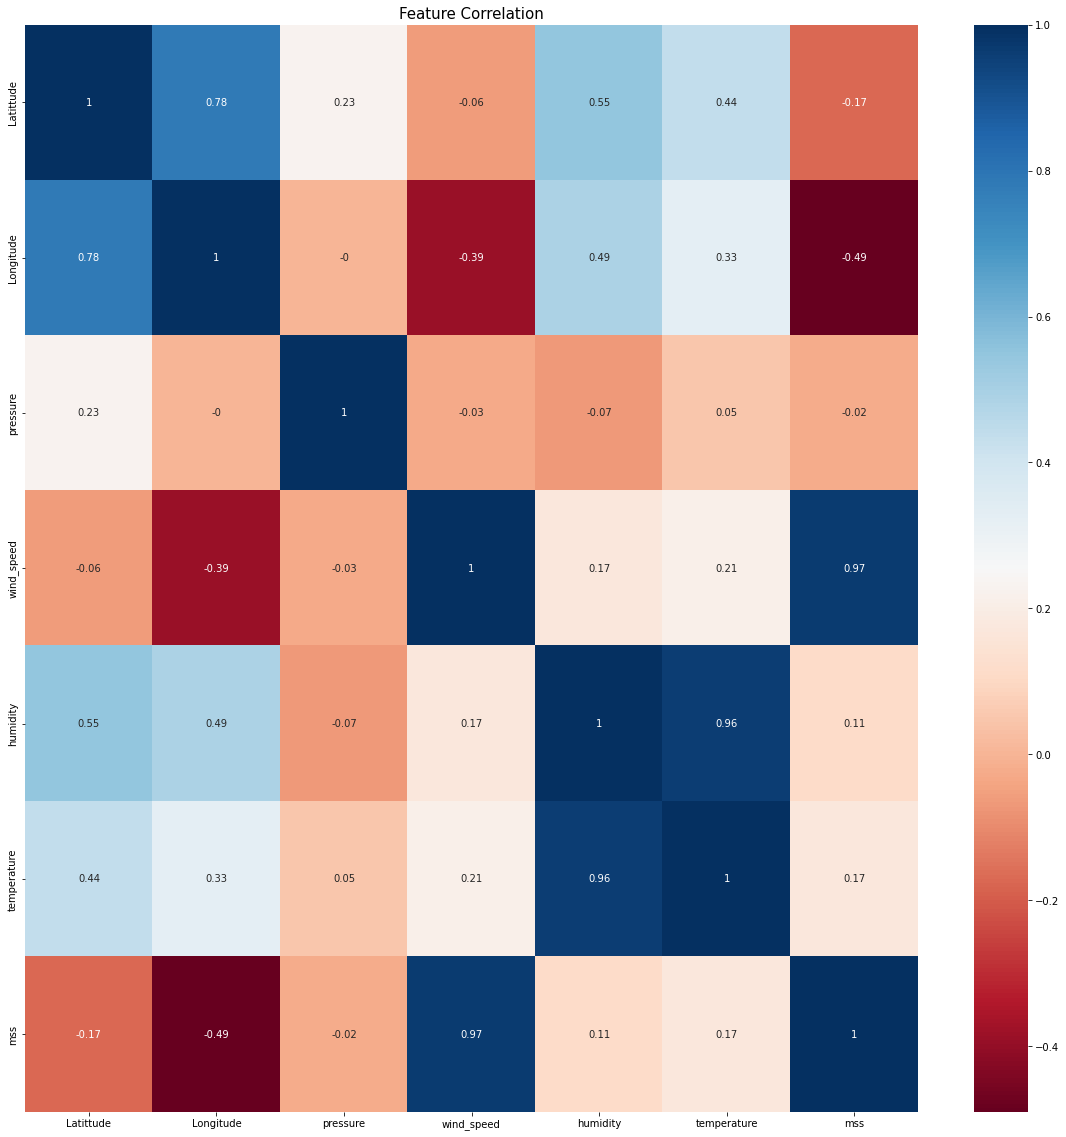

In [4]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import pandas as pd


df=pd.read_csv("/content/final_cleaned.csv")
df=df[['Latittude', 'Longitude', 'pressure','wind_speed', 'humidity', 'temperature', 'mss']]

# Create a correlation heatmap using matplotlib and seaborn
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr().round(2), annot=True, cmap='RdBu')
highlight_color = 'blue'
ax.add_patch(Rectangle((0, 20), 21, 1, fill=False, edgecolor=highlight_color, lw=3))
ax.add_patch(Rectangle((20, 0), 1, 21, fill=False, edgecolor=highlight_color, lw=3))
plt.title("Feature Correlation", fontsize=15)
plt.show()

In [2]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Latittude', 'Longitude', 'pressure',
       'wind_speed', 'humidity', 'temperature', 'mss'],
      dtype='object')

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

In [54]:
cols=["Latittude","Longitude","pressure","wind_speed","humidity","temperature"]
X=df[cols]
y=df["mss"]


In [76]:
rf = RandomForestRegressor(50000,random_state=42)

X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,shuffle=True)
sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_val=sc.transform(X_val)

rf.fit(X_train, y_train)





# Create a dataframe for the model's feature importance
feat_df = pd.DataFrame(rf.feature_importances_, columns=['feature importance'], 
    index=X.columns).sort_values(
    'feature importance', ascending=False)

# Print the 5 highest features in terms of importance
print(feat_df)

             feature importance
wind_speed             0.976049
Longitude              0.011815
Latittude              0.007520
temperature            0.002027
pressure               0.001333
humidity               0.001255


In [77]:
y_pred=rf.predict(X_val)

In [78]:
a=mean_squared_error(y_val,y_pred)

In [79]:
print(a)

4.096572281326709e-07


In [80]:
tp=np.array([14.777475,
             291.6879,
             101398.86,
             3.9896886,
             0.01985223,
             301.92383,

])

In [81]:
tp=tp.reshape(1,-1)

In [82]:
rf.predict(tp)

array([0.0336698])